In [7]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

<ipython-input-7-5b489f4d910b>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


# Sampling

In [8]:
sales = pd.read_csv("G:/data sceince/Python/Forecasting/sales.csv", header = 0, index_col = 0, parse_dates = True, squeeze = True)

In [9]:
sales

Month
1990-01-01    266.0
1990-02-01    145.9
1990-03-01    183.1
1990-04-01    119.3
1990-05-01    180.3
1990-06-01    168.5
1990-07-01    231.8
1990-08-01    224.5
1990-09-01    192.8
1990-10-01    122.9
1990-11-01    336.5
1990-12-01    185.9
1991-01-01    194.3
1991-02-01    149.5
1991-03-01    210.1
1991-04-01    273.3
1991-05-01    191.4
1991-06-01    287.0
1991-07-01    226.0
1991-08-01    303.6
1991-09-01    289.9
1991-10-01    421.6
1991-11-01    264.5
1991-12-01    342.3
1992-01-01    339.7
1992-02-01    440.4
1992-03-01    315.9
1992-04-01    439.3
1992-05-01    401.3
1992-06-01    437.4
1992-07-01    575.5
1992-08-01    407.6
1992-09-01    682.0
1992-10-01    475.3
1992-11-01    581.3
1992-12-01    646.9
Name: Sales, dtype: float64

In [11]:
# Upsampling the data

upsampled = sales.resample('D').mean()                 # resample("D") means we are performing upsampling on our data and as the data we have is monthly data so for upsampling those months will be converted to days hence we have used "D" there.
print(upsampled.head(32))

Month
1990-01-01    266.0
1990-01-02      NaN
1990-01-03      NaN
1990-01-04      NaN
1990-01-05      NaN
1990-01-06      NaN
1990-01-07      NaN
1990-01-08      NaN
1990-01-09      NaN
1990-01-10      NaN
1990-01-11      NaN
1990-01-12      NaN
1990-01-13      NaN
1990-01-14      NaN
1990-01-15      NaN
1990-01-16      NaN
1990-01-17      NaN
1990-01-18      NaN
1990-01-19      NaN
1990-01-20      NaN
1990-01-21      NaN
1990-01-22      NaN
1990-01-23      NaN
1990-01-24      NaN
1990-01-25      NaN
1990-01-26      NaN
1990-01-27      NaN
1990-01-28      NaN
1990-01-29      NaN
1990-01-30      NaN
1990-01-31      NaN
1990-02-01    145.9
Freq: D, Name: Sales, dtype: float64


Data is converted to day wise frequency

Month
1990-01-01    266.000000
1990-01-02    262.125806
1990-01-03    258.251613
1990-01-04    254.377419
1990-01-05    250.503226
1990-01-06    246.629032
1990-01-07    242.754839
1990-01-08    238.880645
1990-01-09    235.006452
1990-01-10    231.132258
1990-01-11    227.258065
1990-01-12    223.383871
1990-01-13    219.509677
1990-01-14    215.635484
1990-01-15    211.761290
1990-01-16    207.887097
1990-01-17    204.012903
1990-01-18    200.138710
1990-01-19    196.264516
1990-01-20    192.390323
1990-01-21    188.516129
1990-01-22    184.641935
1990-01-23    180.767742
1990-01-24    176.893548
1990-01-25    173.019355
1990-01-26    169.145161
1990-01-27    165.270968
1990-01-28    161.396774
1990-01-29    157.522581
1990-01-30    153.648387
1990-01-31    149.774194
1990-02-01    145.900000
Freq: D, Name: Sales, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

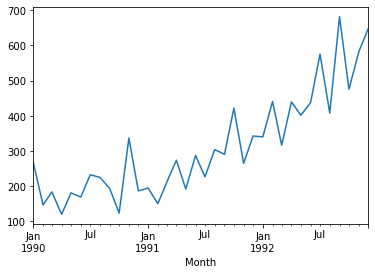

In [12]:
# Interpolating the missing values

interpolate = upsampled.interpolate(method = 'linear')
print(interpolate.head(32))
interpolate.plot()
plt.show

In [13]:
# Downsampling

downsampled = sales.resample('Q').mean()
print(downsampled.head(32))

Month
1990-03-31    198.333333
1990-06-30    156.033333
1990-09-30    216.366667
1990-12-31    215.100000
1991-03-31    184.633333
1991-06-30    250.566667
1991-09-30    273.166667
1991-12-31    342.800000
1992-03-31    365.333333
1992-06-30    426.000000
1992-09-30    555.033333
1992-12-31    567.833333
Freq: Q-DEC, Name: Sales, dtype: float64


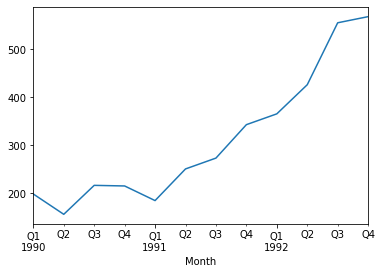

In [14]:
downsampled.plot()
plt.show()

# Transformations

In [21]:
air = pd.read_csv("G:/data sceince/Python/Forecasting/airline-passengers.csv", header = 0, index_col = 0, parse_dates = True)

In [43]:
air.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [30]:
air.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 6.3 KB


(array([24., 27., 19., 18., 22., 13., 10.,  6.,  3.,  2.]),
 array([104. , 155.8, 207.6, 259.4, 311.2, 363. , 414.8, 466.6, 518.4,
        570.2, 622. ]),
 <BarContainer object of 10 artists>)

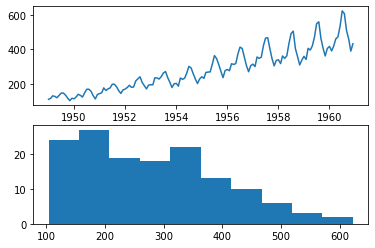

In [24]:
# line plot
plt.subplot(211)
plt.plot(air)

# Histogram
plt.subplot(212)
plt.hist(air)

As the data is a skewed data so in order to convert this data into stationary format we will perform transformations on the data

## Square root Transformation

In [25]:
from numpy import sqrt

In [45]:
# converting the data into dataframe format

air_df = pd.DataFrame(air.values)
air_df.columns = ['passengers']
air_df['passengers'] = sqrt(air_df['passengers'])                 # we cannot transform the time series hence applying transformation on passengers column only

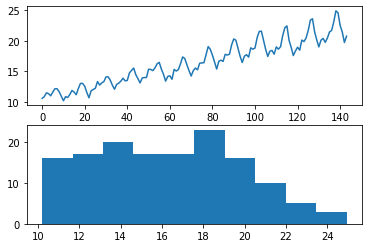

In [47]:
# line plot
plt.subplot(211)
plt.plot(air_df['passengers'])

#Histogram
plt.subplot(212)
plt.hist(air_df['passengers'])
plt.show()

## Logarithmic Transformation

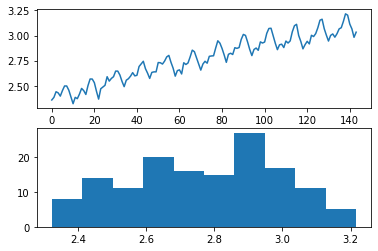

In [49]:
from numpy import log
air_df['passengers'] = log(air_df['passengers']) 

# line plot
plt.subplot(211)
plt.plot(air_df['passengers'])

#Histogram
plt.subplot(212)
plt.hist(air_df['passengers'])
plt.show()

## Exponential Transformation

In [50]:
from numpy import exp

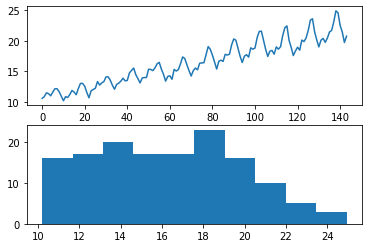

In [51]:
air_df['passengers'] = exp(air_df['passengers']) 

# line plot
plt.subplot(211)
plt.plot(air_df['passengers'])

#Histogram
plt.subplot(212)
plt.hist(air_df['passengers'])
plt.show()